<a href="https://colab.research.google.com/github/laguz/DS-Unit-2-Applied-Modeling/blob/master/Luis_Guzman_DS_Unit_2_Build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [39]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

stock = yf.Ticker("uvxy")

In [40]:
stock = stock.history(period="max")
stock.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-10-04,242700000.0,244800000.0,205800000.0,205800000.0,0,0,0.0
2011-10-05,197460000.0,198900000.0,181380000.0,181380000.0,0,0,0.0
2011-10-06,181140000.0,187800000.0,174000000.0,174000000.0,0,0,0.0
2011-10-07,170580000.0,185760000.0,168480000.0,176520000.0,0,0,0.0
2011-10-10,165480000.0,165600000.0,155940000.0,155940000.0,0,0,0.0


In [41]:
my_list = stock.drop(['Close'], axis=1)
my_list = my_list.columns.values.tolist()

print(my_list)

['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits']


In [42]:
stock_df = my_list.copy()


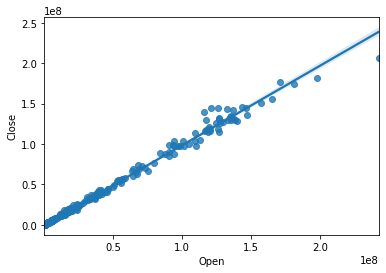

In [43]:
# Import seaborn and matplotlib with the standard aliases
import seaborn as sns
import matplotlib.pyplot as plt

# Load the example penguins dataset
wkhs = stock

# Create a "regplot"
sns.regplot(x="Open", y="Close", data=wkhs, fit_reg=True)

plt.show()

In [45]:
# Create the feature matrix
X_stock = stock[my_list]
print("The shape of the feature matrix: ", X_stock.shape)

# Create the target vector
y_stock = stock['Close']
print("The shape of the target vector: ", y_stock.shape)

The shape of the feature matrix:  (2333, 6)
The shape of the target vector:  (2333,)


In [46]:
# Import the predictor class
from sklearn.linear_model import LinearRegression

# Instantiate the class (with default parameters)
model = LinearRegression(normalize=True)

# Dispay the model parameters
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [47]:
# Fit the model
model.fit(X_stock, y_stock)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [49]:
# Slope (also called the model coefficient)
print(model.coef_)

# Intercept
print(model.intercept_)

# In equation form
print(f'\nClose Price = {model.coef_[0]} x Close + ({model.intercept_})')

[-6.46847766e-01  7.29668940e-01  9.10424540e-01 -4.96559241e-04
  0.00000000e+00  6.87646101e+04]
15417.07686023321

Close Price = -0.6468477656061807 x Close + (15417.07686023321)


In [50]:
# Import the train_test_split utility
from sklearn.model_selection import train_test_split

# Create the "remaining" and test datasets
X_remain, X_test, y_remain, y_test = train_test_split(
    X_stock, y_stock, test_size=0.2, random_state=42)

In [51]:
# Create the train and validation datasets

X_train, X_val, y_train, y_val = train_test_split(
    X_remain, y_remain, test_size=0.25, random_state=42)

# Print out sizes of train, validate, test datasets

print('Training data set samples:', len(X_train))
print('Validation data set samples:', len(X_val))
print('Test data set samples:', len(X_test))

Training data set samples: 1399
Validation data set samples: 467
Test data set samples: 467


In [52]:
# Import the predictor and instantiate the class
from sklearn.linear_model import LinearRegression

# Instantiate the model
model = LinearRegression(normalize=True)

# Fit the model
model.fit(X_train, y_train)

# Use the VALIDATION set for prediction
y_predict = model.predict(X_val)

# Calculate the accuracy score
from sklearn.metrics import r2_score
r2_score(y_val, y_predict)

0.9990350291157128

In [53]:
# Use the TEST set for prediction
y_predict_test = model.predict(X_test)

# Calculate the accuracy score

r2_score(y_test, y_predict_test)

0.999380540452312

In [54]:
# Import the cross validation method
from sklearn.model_selection import cross_val_score

# Implement a cross-validation with k=5
print(cross_val_score(model, X_stock, y_stock, cv=5))

# Calculate the mean of the cross-validation scores
score_mean = cross_val_score(model, X_stock, y_stock, cv=5).mean()
print('The mean CV score is: ', score_mean)

[ 9.98553410e-01  9.59463907e-01 -4.28950743e+00 -7.45446211e+04
 -1.12696141e+07]
The mean CV score is:  -2268832.200535132


In [58]:
# Import the feature selector utility
from sklearn.feature_selection import SelectKBest, f_regression

# Create the selector object with the best k=1 features
selector = SelectKBest(score_func=f_regression, k=1)

# Run the selector on the training data
X_train_selected = selector.fit_transform(X_train, y_train)

# Find the features that was selected
selected_mask = selector.get_support()
all_features = X_train.columns
selected_feature = all_features[selected_mask]

print('The selected feature: ', selected_feature[0])

The selected feature:  Low


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
